<a href="https://colab.research.google.com/github/yegisafari/Reinforcement-learning-RL-Project-1/blob/main/RL_Project1_ipynb_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Reinforcement-Learning-RL

# Project 1


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random

def update_means(Means, NonStationary, k):
    if NonStationary == 'drift':
        Means += np.random.normal(0, 0.001**2)
    elif NonStationary == 'reverting':
        Means = k * Means + np.random.normal(0, 0.01**2)
    return Means

def apply_abrupt_change(Means, Permute_Prob):
    if np.random.rand() < Permute_Prob:
        np.random.shuffle(Means)
    return Means

def greedy_method(Arms, steps, Means, NonStationary, Permute_Prob, Optimal):
    Q = np.random.normal(Means, 1, Arms)
    N = np.zeros(Arms)
    Reward_list = []
    Optimal_Action = []
    k = 0.5

    for step in range(steps):
        Action = np.argmax(Q)
        Reward = np.random.normal(Means[Action], 1)
        Reward_list.append(Reward)
        N[Action] += 1
        Q[Action] += (Reward - Q[Action]) / N[Action]
        Optimal_Action.append(1 if Action == Optimal else 0)
        Means = update_means(Means, NonStationary, k)
        Means = apply_abrupt_change(Means, Permute_Prob)

    return Reward_list, Optimal_Action

def epsilon_greedy_method(Arms, steps, Means, NonStationary, Permute_Prob, Optimal, min_epsilon, decay_rate, Step):
    Q = np.random.normal(Means, 1, Arms)
    N = np.zeros(Arms)
    Reward_list = []
    Optimal_Action = []
    epsilon = 0.5
    k = 0.5

    for step in range(steps):
        if random.random() < epsilon:
            Action = random.randint(0, Arms - 1)
        else:
            Action = np.argmax(Q)
        Reward = np.random.normal(Means[Action], 1)
        Reward_list.append(Reward)
        N[Action] += 1
        if Step is None:
            Q[Action] += (Reward - Q[Action]) / N[Action]
        elif isinstance(Step, float):
            Q[Action] += (Reward - Q[Action]) * Step
        epsilon = max(min_epsilon, epsilon - decay_rate)
        Optimal_Action.append(1 if Action == Optimal else 0)
        Means = update_means(Means, NonStationary, k)
        Means = apply_abrupt_change(Means, Permute_Prob)

    return Reward_list, Optimal_Action

def optimistic_method(Arms, steps, Means, NonStationary, Permute_Prob, Optimal):
    Q = np.ones(Arms) * 10
    N = np.zeros(Arms)
    Reward_list = []
    Optimal_Action = []
    k = 0.5

    for step in range(steps):
        Action = np.argmax(Q)
        Reward = np.random.normal(Means[Action], 1)
        Reward_list.append(Reward)
        N[Action] += 1
        Q[Action] += (Reward - Q[Action]) / N[Action]
        Optimal_Action.append(1 if Action == Optimal else 0)
        Means = update_means(Means, NonStationary, k)
        Means = apply_abrupt_change(Means, Permute_Prob)

    return Reward_list, Optimal_Action

def gradient_method(Arms, steps, Means, NonStationary, Permute_Prob, Optimal, Alpha):
    H = np.zeros(Arms)
    Reward_list = []
    Optimal_Action = []
    Avg_reward = 0
    k = 0.5

    for step in range(steps):
        H_Exp = np.exp(H)
        Policy = H_Exp / np.sum(H_Exp)
        Action = np.random.choice(Arms, p=Policy)
        Reward = np.random.normal(Means[Action], 1)
        Avg_reward += (Reward - Avg_reward) / (step + 1)
        for j in range(Arms):
            if j == Action:
                H[j] += Alpha * (Reward - Avg_reward) * (1 - Policy[j])
            else:
                H[j] -= Alpha * (Reward - Avg_reward) * Policy[j]
        Reward_list.append(Reward)
        Optimal_Action.append(1 if Action == Optimal else 0)
        Means = update_means(Means, NonStationary, k)
        Means = apply_abrupt_change(Means, Permute_Prob)

    return Reward_list, Optimal_Action

def MultiArmedBandit(n=10, steps=1000, method='greedy', Alpha=0.1, NonStationary='drift', Permute_Prob=0, Step=None):
    Arms = n
    Means = np.random.normal(0, 1, Arms)
    Optimal = np.argmax(Means)
    min_epsilon = 0.1
    decay_rate = 0.0004

    if method == 'greedy':
        return greedy_method(Arms, steps, Means, NonStationary, Permute_Prob, Optimal)
    elif method == 'epsilon':
        return epsilon_greedy_method(Arms, steps, Means, NonStationary, Permute_Prob, Optimal, min_epsilon, decay_rate, Step)
    elif method == 'optimistic':
        return optimistic_method(Arms, steps, Means, NonStationary, Permute_Prob, Optimal)
    elif method == 'gradient':
        return gradient_method(Arms, steps, Means, NonStationary, Permute_Prob, Optimal, Alpha)
    else:
        print("Wrong method")
        return 0

 so here instead of relying on separate functions for running experiments and plotting results, we used a more modular approach to handle the experimentation and plotting.

Part One

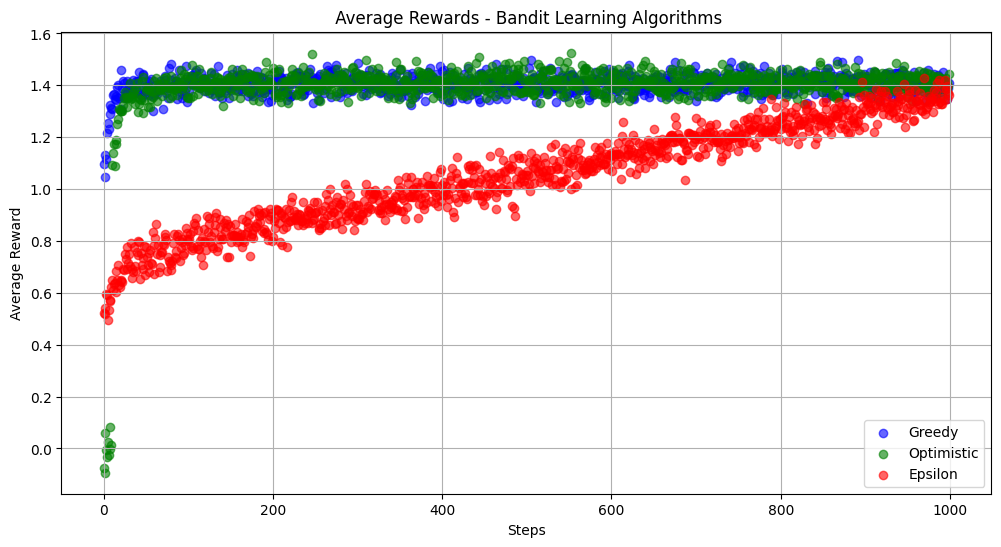

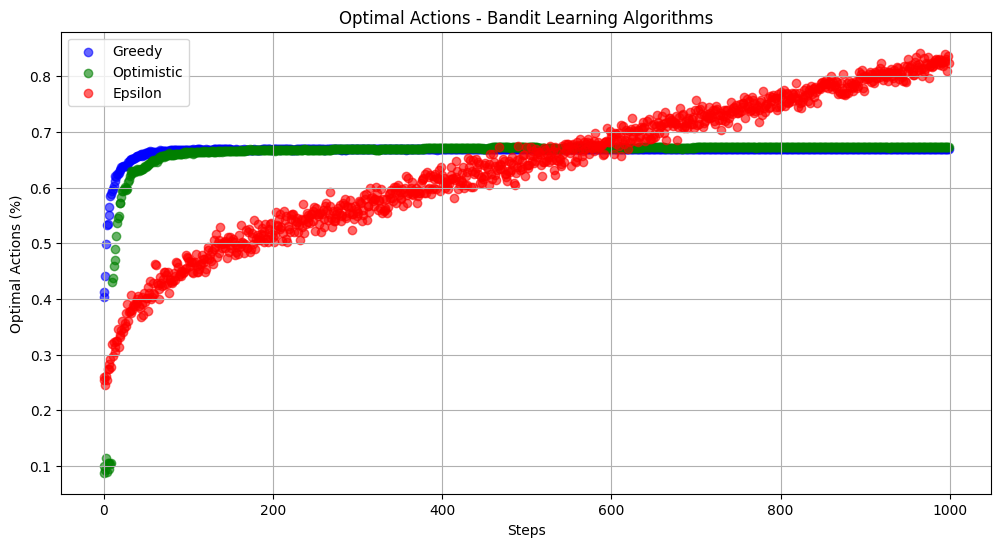

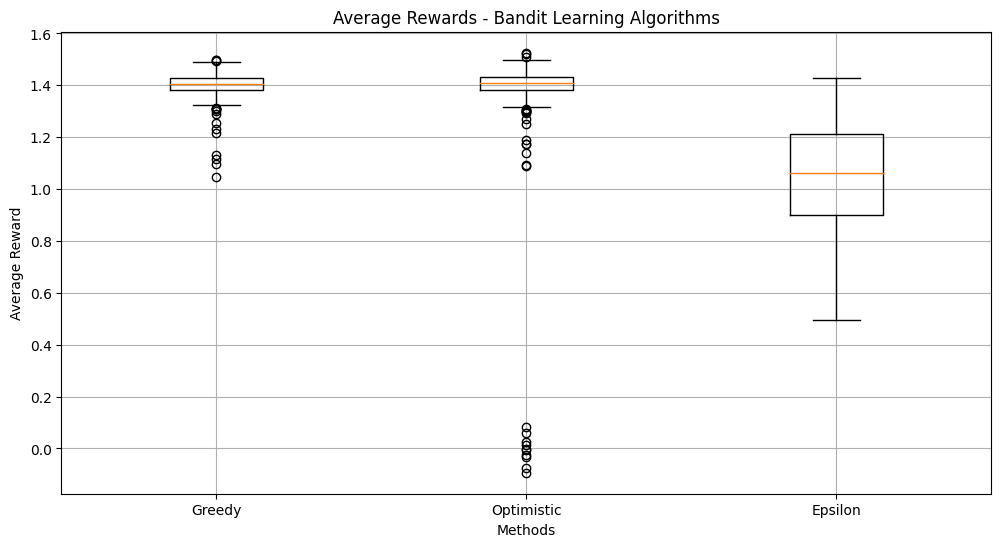

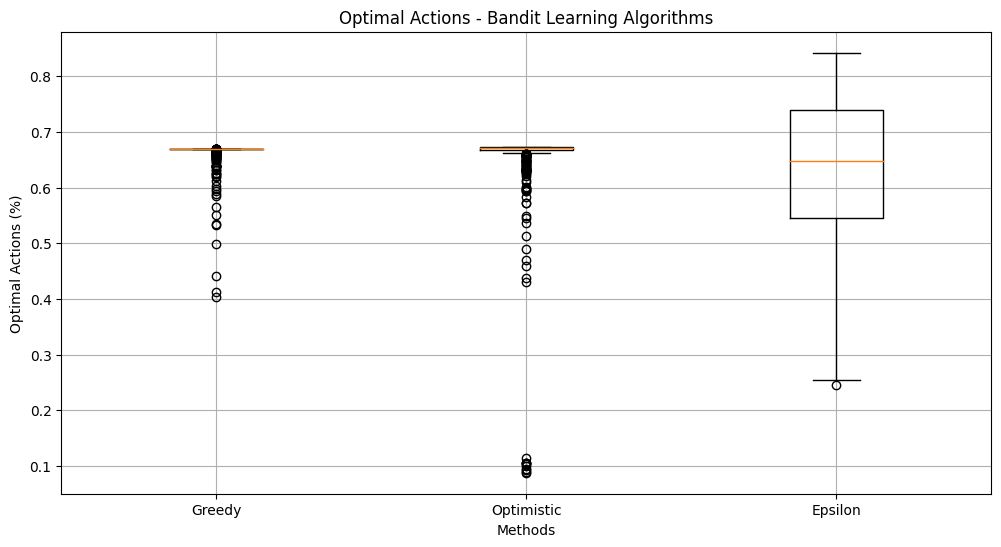

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def run_bandit_experiment(method, experiments, steps, **kwargs):
    rewards = np.zeros((experiments, steps))
    optimal_actions = np.zeros((experiments, steps))
    for i in range(experiments):
        reward_list, optimal_action_list = MultiArmedBandit(method=method, steps=steps, **kwargs)
        rewards[i] = reward_list
        optimal_actions[i] = optimal_action_list
    return rewards, optimal_actions

def plot_bandit_results_line(results, title, ylabel, metric):
    colors = ['b', 'g', 'r']
    plt.figure(figsize=(12, 6))
    for i, (method, (rewards, optimal_actions)) in enumerate(results.items()):
        mean_values = np.mean(rewards if metric == 0 else optimal_actions, axis=0)
        plt.plot(mean_values, label=method.capitalize(), color=colors[i])
    plt.xlabel('Steps')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_bandit_results_scatter(results, title, ylabel, metric):
    colors = ['b', 'g', 'r']
    plt.figure(figsize=(12, 6))
    for i, (method, (rewards, optimal_actions)) in enumerate(results.items()):
        mean_values = np.mean(rewards if metric == 0 else optimal_actions, axis=0)
        plt.scatter(range(len(mean_values)), mean_values, label=method.capitalize(), color=colors[i], alpha=0.6)
    plt.xlabel('Steps')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_bandit_results_box(results, title, ylabel, metric):
    plt.figure(figsize=(12, 6))
    data = [np.mean(results[method][metric], axis=0) for method in results]
    plt.boxplot(data, labels=[method.capitalize() for method in results])
    plt.xlabel('Methods')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

# Parameters
experiments = 1000
steps = 1000

methods = ['greedy', 'optimistic', 'epsilon']
results = {}
for method in methods:
    rewards, optimal_actions = run_bandit_experiment(method, experiments, steps, NonStationary=None)
    results[method] = (rewards, optimal_actions)

# scatter plots
plot_bandit_results_scatter(results, ' Average Rewards - Bandit Learning Algorithms', 'Average Reward', 0)
plot_bandit_results_scatter(results, 'Optimal Actions - Bandit Learning Algorithms', 'Optimal Actions (%)', 1)

# box plots
plot_bandit_results_box(results, 'Average Rewards - Bandit Learning Algorithms', 'Average Reward', 0)
plot_bandit_results_box(results, 'Optimal Actions - Bandit Learning Algorithms', 'Optimal Actions (%)', 1)

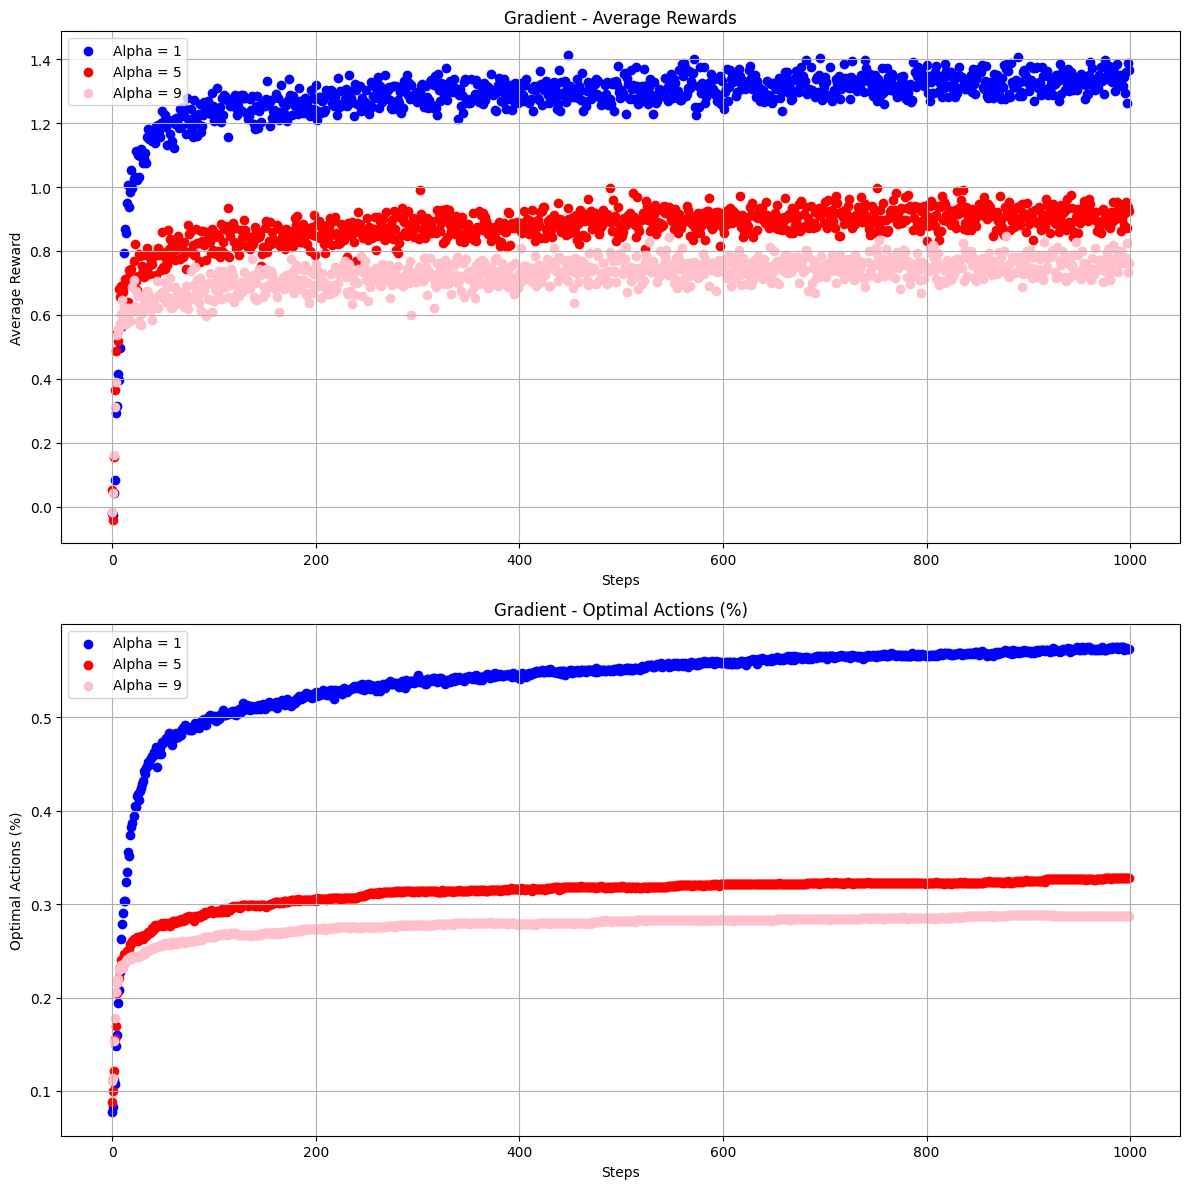

In [20]:
def run_gradient_experiments(alphas, experiments, steps, **kwargs):
    results = {alpha: {'rewards': np.zeros((experiments, steps)), 'optimal_actions': np.zeros((experiments, steps))} for alpha in alphas}
    for i in range(experiments):
        for alpha in alphas:
            reward_list, optimal_action_list = MultiArmedBandit(method='gradient', Alpha=alpha, steps=steps, **kwargs)
            results[alpha]['rewards'][i] = reward_list
            results[alpha]['optimal_actions'][i] = optimal_action_list
    return results

def plot_gradient_results_scatter(results, title_rewards, title_optimal_actions, ylabel_rewards, ylabel_optimal_actions):
    colors = ['b', 'r', 'pink']
    alphas = list(results.keys())

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

    for i, alpha in enumerate(alphas):
        mean_rewards = np.mean(results[alpha]['rewards'], axis=0)
        ax1.scatter(range(len(mean_rewards)), mean_rewards, label=f'Alpha = {alpha}', color=colors[i])
    ax1.set_xlabel('Steps')
    ax1.set_ylabel(ylabel_rewards)
    ax1.set_title(title_rewards)
    ax1.legend()
    ax1.grid(True)


    for i, alpha in enumerate(alphas):
        mean_optimal_actions = np.mean(results[alpha]['optimal_actions'], axis=0)
        ax2.scatter(range(len(mean_optimal_actions)), mean_optimal_actions, label=f'Alpha = {alpha}', color=colors[i])
    ax2.set_xlabel('Steps')
    ax2.set_ylabel(ylabel_optimal_actions)
    ax2.set_title(title_optimal_actions)
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

# Parameters
experiments = 1000
steps = 1000
alphas = [1, 5, 9]
results = run_gradient_experiments(alphas, experiments, steps, NonStationary=None)
plot_gradient_results_scatter(results, 'Gradient - Average Rewards', 'Gradient - Optimal Actions (%)', 'Average Reward', 'Optimal Actions (%)')

Part Two - Gradual Changes

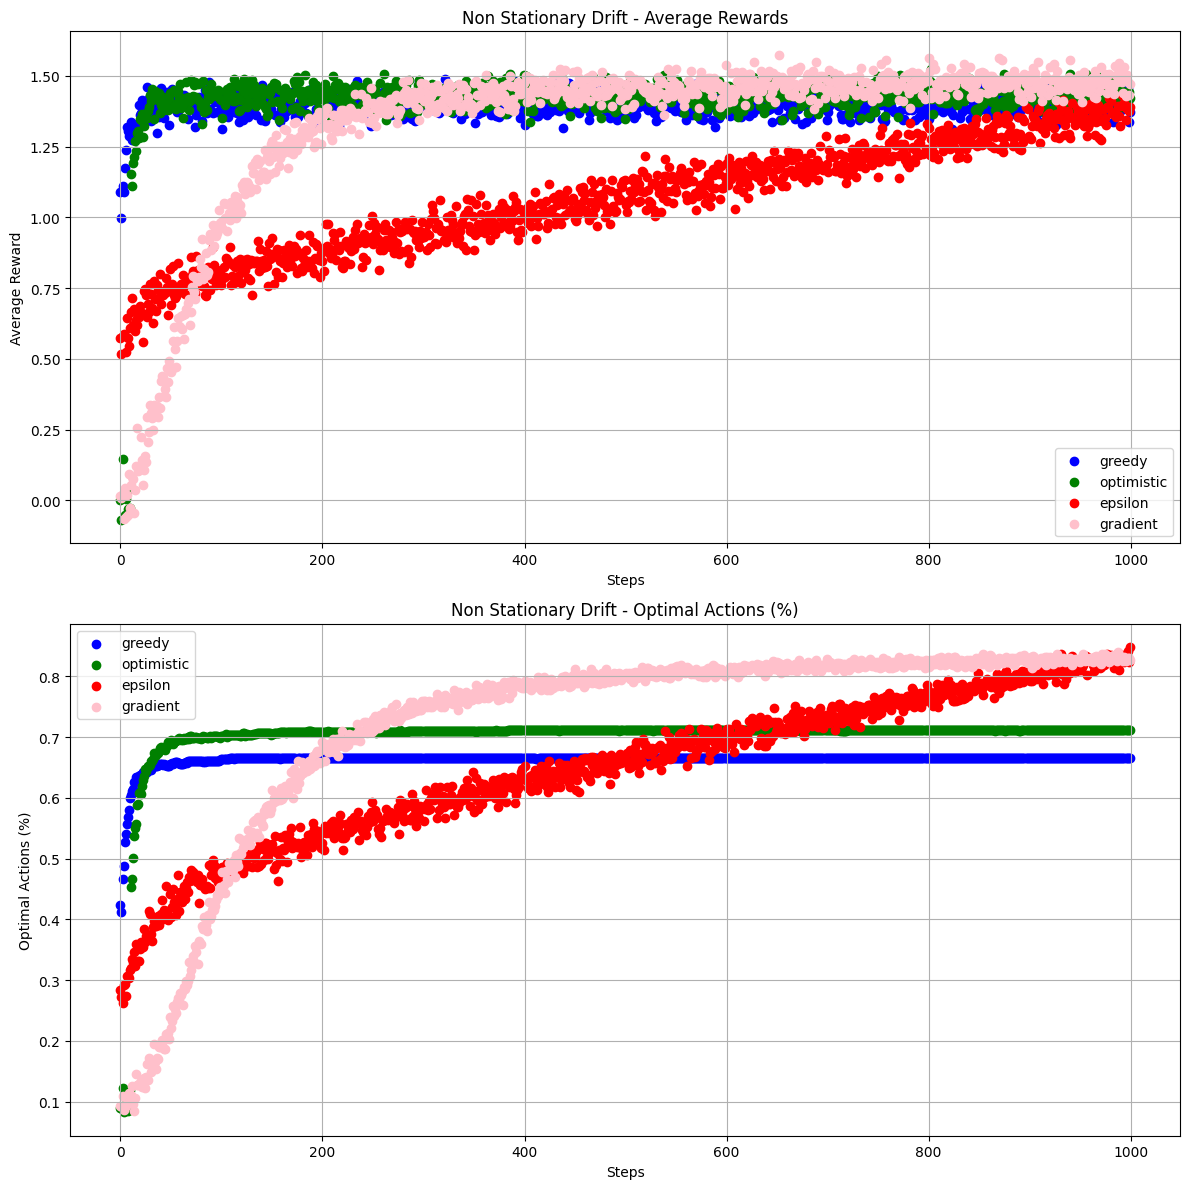

In [21]:
def run_experiment(method, non_stationary, experiments, steps):
    rewards = np.zeros((experiments, steps))
    optimal_actions = np.zeros((experiments, steps))
    for i in range(experiments):
        reward_list, optimal_action_list = MultiArmedBandit(method=method, NonStationary=non_stationary, steps=steps)
        rewards[i] = reward_list
        optimal_actions[i] = optimal_action_list
    return rewards, optimal_actions

def plot_results_scatter(results, methods, title_rewards, title_optimal_actions, ylabel_rewards, ylabel_optimal_actions, colors):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

    for i, method in enumerate(methods):
        mean_rewards = np.mean(results[method]['rewards'], axis=0)
        ax1.scatter(range(len(mean_rewards)), mean_rewards, label=method, color=colors[i])
    ax1.set_xlabel('Steps')
    ax1.set_ylabel(ylabel_rewards)
    ax1.set_title(title_rewards)
    ax1.legend()
    ax1.grid(True)

    for i, method in enumerate(methods):
        mean_optimal_actions = np.mean(results[method]['optimal_actions'], axis=0)
        ax2.scatter(range(len(mean_optimal_actions)), mean_optimal_actions, label=method, color=colors[i])
    ax2.set_xlabel('Steps')
    ax2.set_ylabel(ylabel_optimal_actions)
    ax2.set_title(title_optimal_actions)
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

# Parameters
experiments = 1000
steps = 1000
non_stationary = 'drift'
methods = ['greedy', 'optimistic', 'epsilon', 'gradient']
colors = ['blue', 'green', 'red', 'pink']

results = {}
for method in methods:
    rewards, optimal_actions = run_experiment(method, non_stationary, experiments, steps)
    results[method] = {'rewards': rewards, 'optimal_actions': optimal_actions}

plot_results_scatter(results, methods, 'Non Stationary Drift - Average Rewards', 'Non Stationary Drift - Optimal Actions (%)', 'Average Reward', 'Optimal Actions (%)', colors)

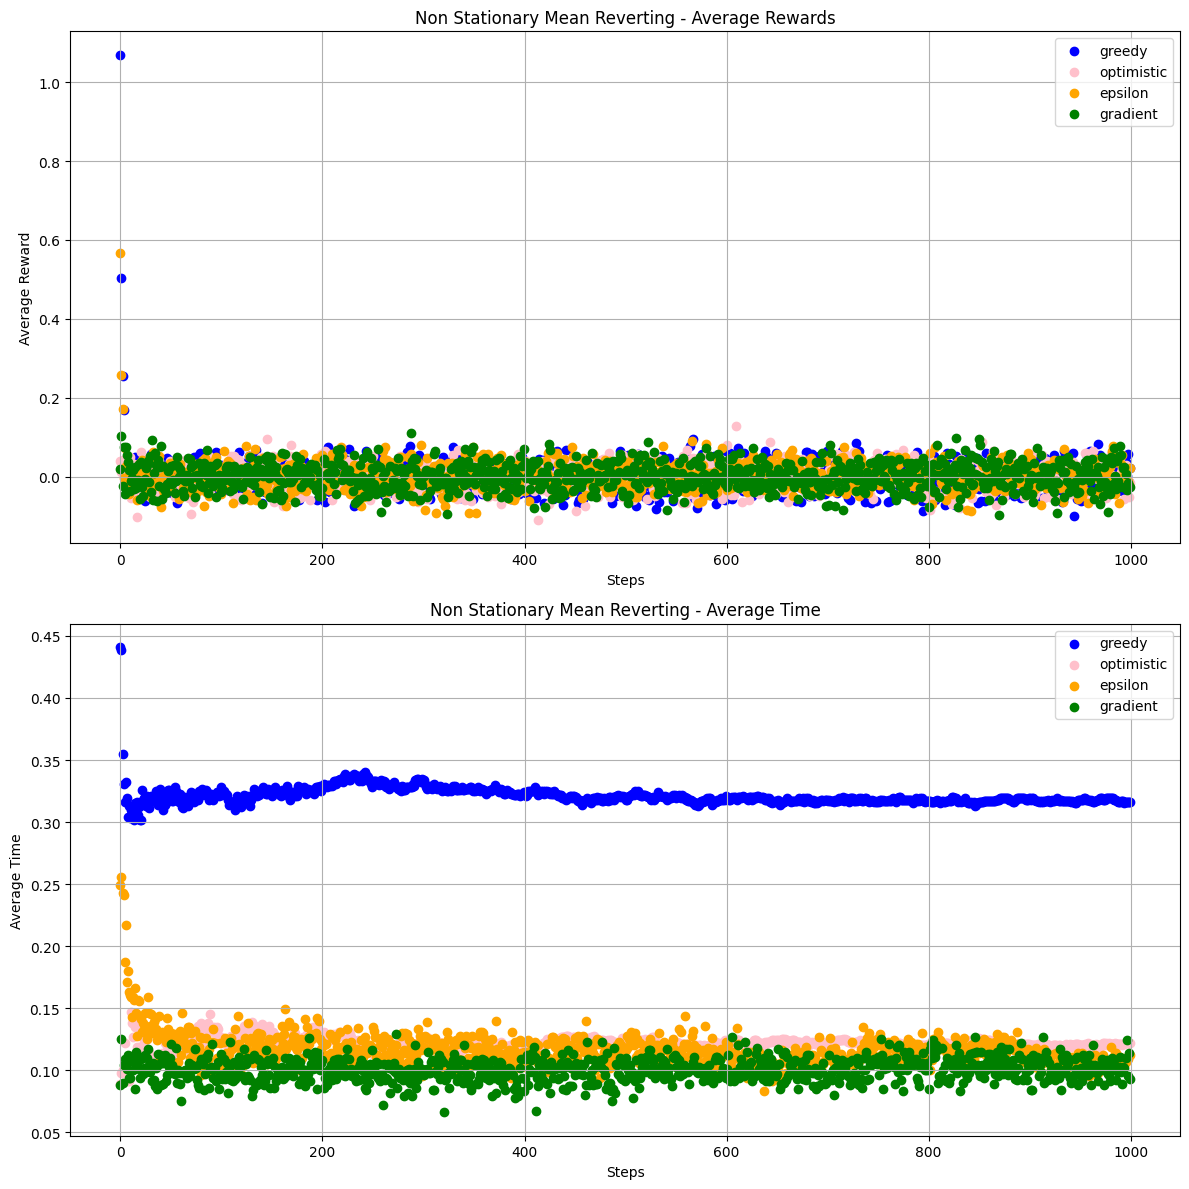

In [22]:
def run_experiment(method, non_stationary, experiments, steps):
    rewards = np.zeros((experiments, steps))
    times = np.zeros((experiments, steps))
    for i in range(experiments):
        reward_list, time_avg = MultiArmedBandit(method=method, NonStationary=non_stationary, steps=steps)
        rewards[i] = reward_list
        times[i] = time_avg
    return rewards, times

def plot_scatter_results(results, methods, title_rewards, title_times, ylabel_rewards, ylabel_times, colors):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

    for i, method in enumerate(methods):
        mean_rewards = np.mean(results[method]['rewards'], axis=0)
        ax1.scatter(range(len(mean_rewards)), mean_rewards, label=method, color=colors[i])
    ax1.set_xlabel('Steps')
    ax1.set_ylabel(ylabel_rewards)
    ax1.set_title(title_rewards)
    ax1.legend()
    ax1.grid(True)

    for i, method in enumerate(methods):
        mean_times = np.mean(results[method]['times'], axis=0)
        ax2.scatter(range(len(mean_times)), mean_times, label=method, color=colors[i])
    ax2.set_xlabel('Steps')
    ax2.set_ylabel(ylabel_times)
    ax2.set_title(title_times)
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

experiments = 1000
steps = 1000
non_stationary = 'reverting'
methods = ['greedy', 'optimistic', 'epsilon', 'gradient']
colors = ['blue', 'pink', 'orange', 'green']

results = {}
for method in methods:
    rewards, times = run_experiment(method, non_stationary, experiments, steps)
    results[method] = {'rewards': rewards, 'times': times}

plot_scatter_results(results, methods, 'Non Stationary Mean Reverting - Average Rewards', 'Non Stationary Mean Reverting - Average Time', 'Average Reward', 'Average Time', colors)

Abrupt Changes

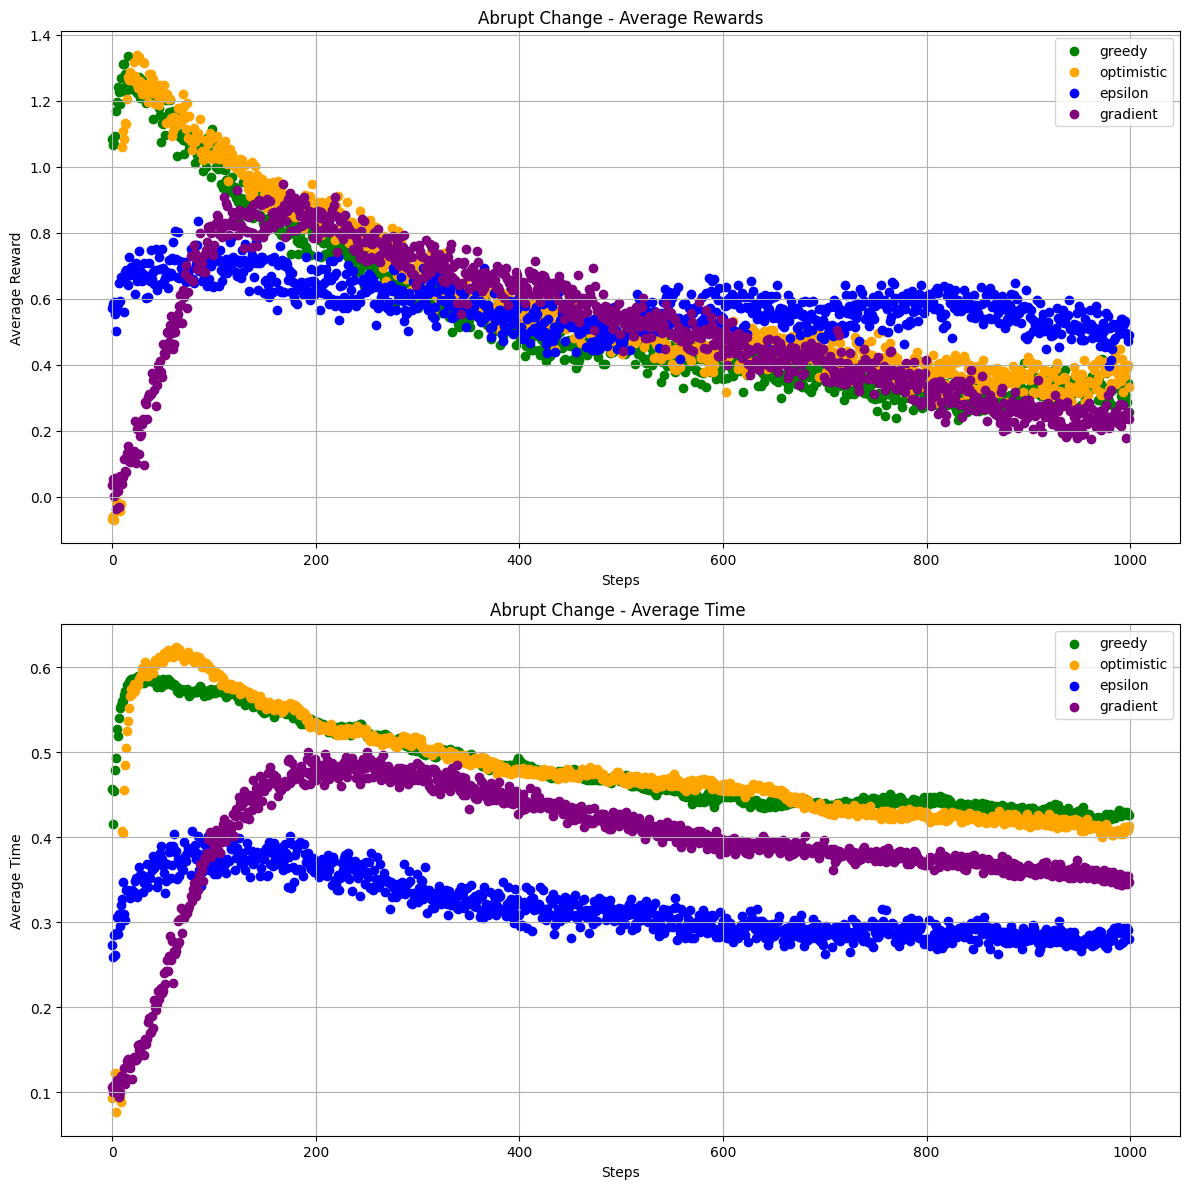

In [23]:
def run_experiment(method, permute_prob, experiments, steps):
    rewards = np.zeros((experiments, steps))
    times = np.zeros((experiments, steps))
    for i in range(experiments):
        reward_list, time_avg = MultiArmedBandit(method=method, Permute_Prob=permute_prob, steps=steps)
        rewards[i] = reward_list
        times[i] = time_avg
    return rewards, times

def plot_scatter_results(results, methods, title_rewards, title_times, ylabel_rewards, ylabel_times, colors):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

    for i, method in enumerate(methods):
        mean_rewards = np.mean(results[method]['rewards'], axis=0)
        ax1.scatter(range(len(mean_rewards)), mean_rewards, label=method, color=colors[i])
    ax1.set_xlabel('Steps')
    ax1.set_ylabel(ylabel_rewards)
    ax1.set_title(title_rewards)
    ax1.legend()
    ax1.grid(True)

    for i, method in enumerate(methods):
        mean_times = np.mean(results[method]['times'], axis=0)
        ax2.scatter(range(len(mean_times)), mean_times, label=method, color=colors[i])
    ax2.set_xlabel('Steps')
    ax2.set_ylabel(ylabel_times)
    ax2.set_title(title_times)
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

experiments = 1000
steps = 1000
permute_prob = 0.005
methods = ['greedy', 'optimistic', 'epsilon', 'gradient']
colors = ['green', 'orange', 'blue', 'purple']


results = {}
for method in methods:
    rewards, times = run_experiment(method, permute_prob, experiments, steps)
    results[method] = {'rewards': rewards, 'times': times}
plot_scatter_results(results, methods, 'Abrupt Change - Average Rewards', 'Abrupt Change - Average Time ', 'Average Reward', 'Average Time', colors)

Evaluation

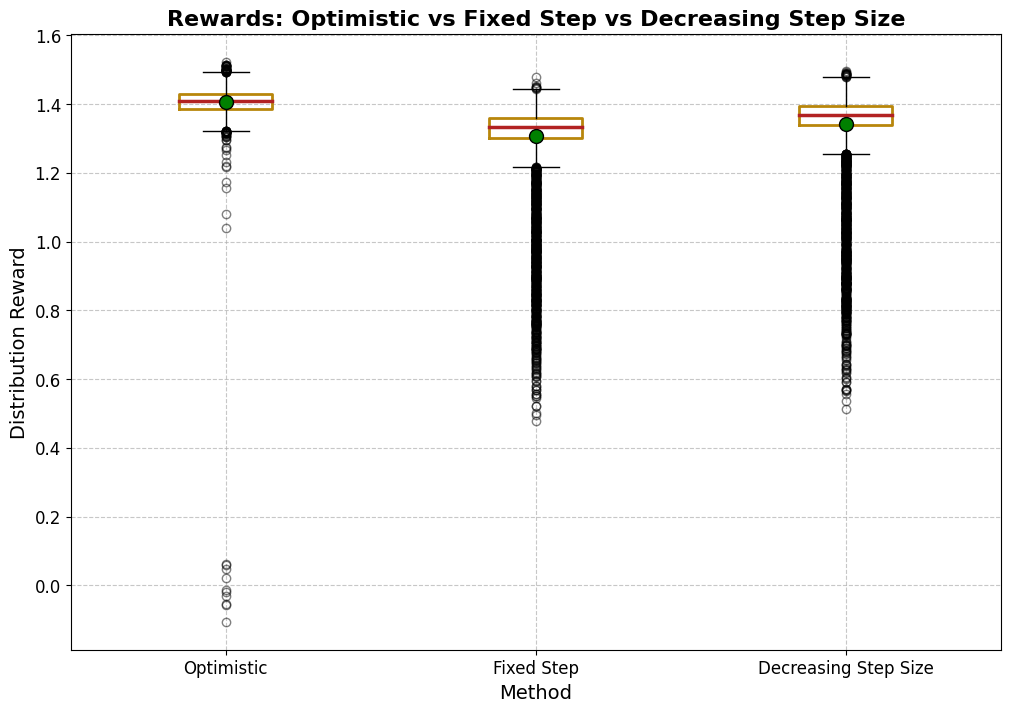

In [25]:
def run_experiment(steps, method, non_stationary, step=None):
    Reward_list, _ = MultiArmedBandit(steps=steps, method=method, NonStationary=non_stationary, Step=step)
    return Reward_list

experiments = 1000
steps = 10000

Rewards_Optimistic_Drift_Evaluation = np.zeros((experiments, steps))
Rewards_EpsilonFixed_Drift_Evaluation = np.zeros((experiments, steps))
Rewards_EpsilonDecrease_Drift_Evaluation = np.zeros((experiments, steps))

for i in range(experiments):
    Rewards_Optimistic_Drift_Evaluation[i] = run_experiment(steps, 'optimistic', 'drift')
    Rewards_EpsilonFixed_Drift_Evaluation[i] = run_experiment(steps, 'epsilon', 'drift', step=0.1)
    Rewards_EpsilonDecrease_Drift_Evaluation[i] = run_experiment(steps, 'epsilon', 'drift')

plt.figure(figsize=(12, 8))
boxprops = dict(linestyle='-', linewidth=2, color='darkgoldenrod')
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
meanprops = dict(marker='o', markerfacecolor='green', markeredgecolor='black', markersize=10)
flierprops = dict(marker='o', color='purple', alpha=0.5)

plt.boxplot(
    [
        np.mean(Rewards_Optimistic_Drift_Evaluation, axis=0),
        np.mean(Rewards_EpsilonFixed_Drift_Evaluation, axis=0),
        np.mean(Rewards_EpsilonDecrease_Drift_Evaluation, axis=0)
    ],
    labels=['Optimistic', 'Fixed Step', 'Decreasing Step Size'],
    boxprops=boxprops,
    medianprops=medianprops,
    meanprops=meanprops,
    flierprops=flierprops,
    showmeans=True
)
plt.title('Rewards: Optimistic vs Fixed Step vs Decreasing Step Size', fontsize=16, fontweight='bold')
plt.ylabel('Distribution Reward', fontsize=14)
plt.xlabel('Method', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

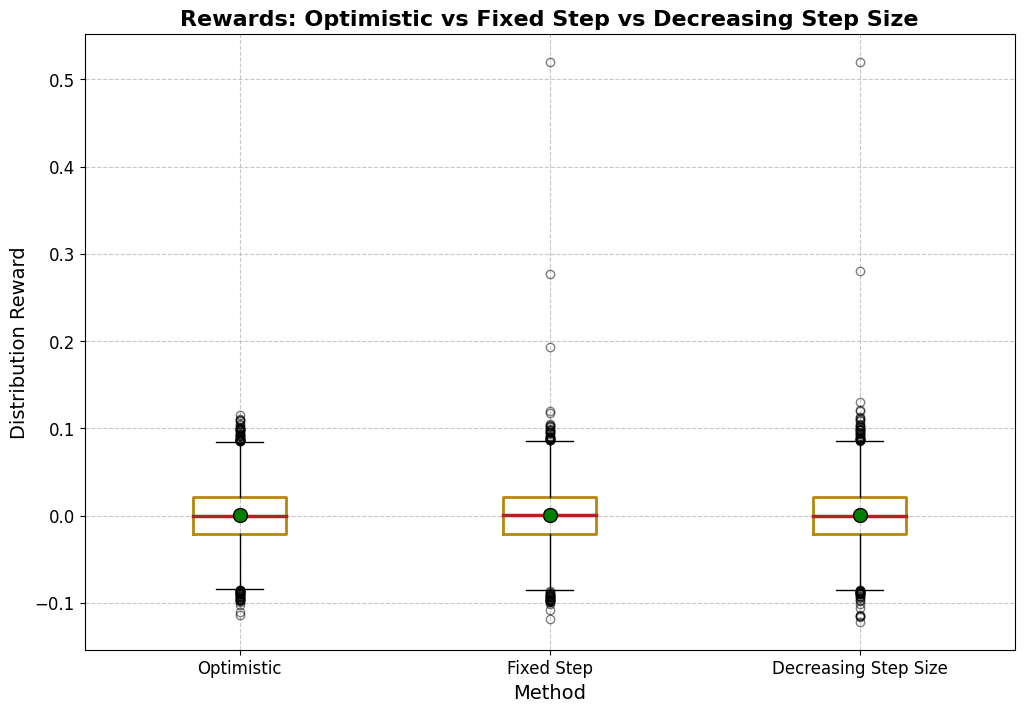

In [27]:
def run_experiment(steps, method, non_stationary, step=None):
    Reward_list, _ = MultiArmedBandit(steps=steps, method=method, NonStationary=non_stationary, Step=step)
    return Reward_list

experiments = 1000
steps = 10000
Rewards_Optimistic_Reverting_Evaluation = np.zeros((experiments, steps))
Rewards_EpsilonFixed_Reverting_Evaluation = np.zeros((experiments, steps))
Rewards_EpsilonDecrease_Reverting_Evaluation = np.zeros((experiments, steps))

for i in range(experiments):
    Rewards_Optimistic_Reverting_Evaluation[i] = run_experiment(steps, 'optimistic', 'reverting')
    Rewards_EpsilonFixed_Reverting_Evaluation[i] = run_experiment(steps, 'epsilon', 'reverting', step=0.1)
    Rewards_EpsilonDecrease_Reverting_Evaluation[i] = run_experiment(steps, 'epsilon', 'reverting')

plt.figure(figsize=(12, 8))
boxprops = dict(linestyle='-', linewidth=2, color='darkgoldenrod')
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
meanprops = dict(marker='o', markerfacecolor='green', markeredgecolor='black', markersize=10)
flierprops = dict(marker='o', color='purple', alpha=0.5)

plt.boxplot(
    [
        np.mean(Rewards_Optimistic_Reverting_Evaluation, axis=0),
        np.mean(Rewards_EpsilonFixed_Reverting_Evaluation, axis=0),
        np.mean(Rewards_EpsilonDecrease_Reverting_Evaluation, axis=0)
    ],
    labels=['Optimistic', 'Fixed Step', 'Decreasing Step Size'],
    boxprops=boxprops,
    medianprops=medianprops,
    meanprops=meanprops,
    flierprops=flierprops,
    showmeans=True
)
plt.title('Rewards: Optimistic vs Fixed Step vs Decreasing Step Size', fontsize=16, fontweight='bold')
plt.ylabel('Distribution Reward', fontsize=14)
plt.xlabel('Method', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

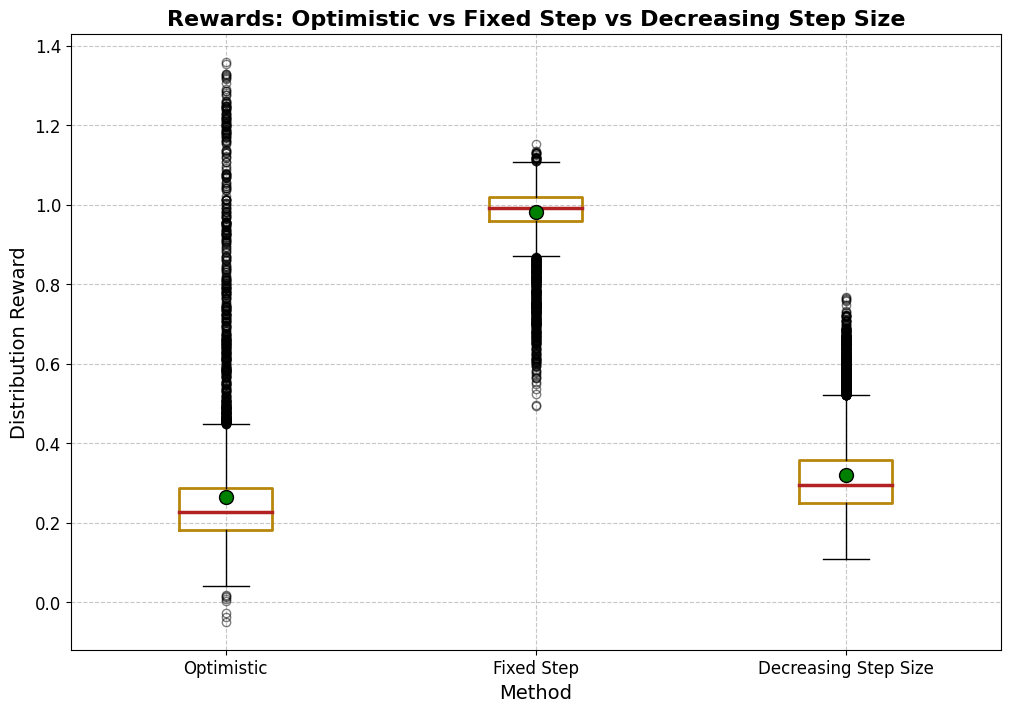

In [28]:
def run_experiment(steps, method, permute_prob, step=None):
    Reward_list, _ = MultiArmedBandit(steps=steps, method=method, Permute_Prob=permute_prob, Step=step)
    return Reward_list

experiments = 1000
steps = 10000
permute_prob = 0.005

Rewards_Optimistic_Abrupt_Evaluation = np.zeros((experiments, steps))
Rewards_EpsilonFixed_Abrupt_Evaluation = np.zeros((experiments, steps))
Rewards_EpsilonDecrease_Abrupt_Evaluation = np.zeros((experiments, steps))

for i in range(experiments):
    Rewards_Optimistic_Abrupt_Evaluation[i] = run_experiment(steps, 'optimistic', permute_prob)
    Rewards_EpsilonFixed_Abrupt_Evaluation[i] = run_experiment(steps, 'epsilon', permute_prob, step=0.1)
    Rewards_EpsilonDecrease_Abrupt_Evaluation[i] = run_experiment(steps, 'epsilon', permute_prob)

plt.figure(figsize=(12, 8))
boxprops = dict(linestyle='-', linewidth=2, color='darkgoldenrod')
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
meanprops = dict(marker='o', markerfacecolor='green', markeredgecolor='black', markersize=10)
flierprops = dict(marker='o', color='purple', alpha=0.5)

plt.boxplot(
    [
        np.mean(Rewards_Optimistic_Abrupt_Evaluation, axis=0),
        np.mean(Rewards_EpsilonFixed_Abrupt_Evaluation, axis=0),
        np.mean(Rewards_EpsilonDecrease_Abrupt_Evaluation, axis=0)
    ],
    labels=['Optimistic', 'Fixed Step', 'Decreasing Step Size'],
    boxprops=boxprops,
    medianprops=medianprops,
    meanprops=meanprops,
    flierprops=flierprops,
    showmeans=True
)
plt.title('Rewards: Optimistic vs Fixed Step vs Decreasing Step Size', fontsize=16, fontweight='bold')
plt.ylabel('Distribution Reward', fontsize=14)
plt.xlabel('Method', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()